In [7]:
import os 
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sys
sys.path.append('../..')
from data.data_loader import get_splits
from utils.plot import plot_2D

# Reading and displaying data from file full_encoded.csv
dataFull = get_splits('../../data/encoded_data/full_encoded.csv', 0.2)

X_trainFull = dataFull['X_train']
y_trainFull = dataFull['Y_train']
X_testFull = dataFull['X_test']
y_testFull = dataFull['Y_test']

display(X_trainFull)
display(y_trainFull)
display(X_testFull)
display(y_testFull)




starting to read csv...
finished reading csv.
splitting data into training and testing sets.


,year,condition,cylinders,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
77249,0.019048,0.75,0.500000,0.001000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69463,0.285714,1.00,0.666667,0.003595,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24077,0.066667,1.00,0.333333,0.010300,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17524,0.076190,0.50,0.333333,0.010700,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115461,0.171429,0.75,0.666667,0.016900,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115106,0.038095,0.75,0.333333,0.005900,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5850,0.085714,0.75,0.500000,0.015567,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
116869,0.161905,0.50,0.666667,0.023732,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81309,0.142857,0.75,0.333333,0.001639,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


77249     5.972174e-06
69463     2.180538e-06
24077     4.166633e-07
17524     1.236101e-06
115461    5.554122e-06
              ...     
115106    1.916651e-06
5850      3.055253e-06
116869    2.220816e-06
81309     1.518599e-06
44169     3.666637e-06
Name: price, Length: 94037, dtype: float64

,year,condition,cylinders,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
74235,0.180952,0.50,0.333333,0.015660,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18862,0.085714,0.75,0.666667,0.013735,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114413,0.095238,0.75,0.500000,0.011877,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84885,0.095238,0.50,0.666667,0.014110,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53670,0.200000,0.75,0.333333,0.025200,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56154,0.095238,0.75,0.333333,0.007490,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96504,0.057143,0.75,0.666667,0.004060,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65318,0.085714,1.00,0.666667,0.011250,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28150,0.085714,0.50,0.333333,0.011700,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


74235     8.330489e-07
18862     7.777438e-06
114413    1.638876e-06
84885     1.222212e-06
53670     3.888858e-06
              ...     
56154     1.041658e-06
96504     7.777715e-06
65318     5.555233e-06
28150     1.944429e-06
26779     4.305521e-06
Name: price, Length: 23510, dtype: float64

In [35]:
X_trainFull,X_valFull,y_trainFull,y_valFull = train_test_split(X_trainFull, y_trainFull, test_size = 0.25, random_state = 0)

# Show the results of the split
print("The train set has an example of {}.".format(X_trainFull.shape[0]))
print("Validation set has an example of {}.".format(X_valFull.shape[0]))
print("The test set has an example of {}.".format(X_testFull.shape[0]))

X_trainFull=np.array(X_trainFull) #lists are converted to numpy arrays
y_trainFull=np.array(y_trainFull)
X_valFull=np.array(X_valFull)
y_valFull=np.array(y_valFull)
X_testFull=np.array(X_testFull)
y_testFull=np.array(y_testFull)

The train set has an example of 70527.
Validation set has an example of 23510.
The test set has an example of 23510.


In [36]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import ModelCheckpoint, Callback
from keras import backend
from keras.optimizers import adam

# Lost function is selected as mean absolute error
loss_function='mean_absolute_error'

# The sequential model is created to use compile-fit-evaluate-predict methods
price_predictor = Sequential()

"""# Neural network layers are created with RELU activation
price_predictor.add(Dense(128,activation='relu', input_dim=808))  
price_predictor.add(Dense(64))
price_predictor.add(Dense(64))
price_predictor.add(Dense(64))
price_predictor.add(Dense(32,activation='relu'))
price_predictor.add(Dense(8))
price_predictor.add(Dense(1))
price_predictor.summary()"""
# Neural network layers are created with RELU activation
price_predictor.add(Dense(64,activation='relu', input_dim=808))  
price_predictor.add(Dense(32))
price_predictor.add(Dense(8))
price_predictor.add(Dense(1))
price_predictor.summary()


# Array used to store test errors
test_errs = []
opt = adam(lr=0.00001)

# Here the Adam optimizer (different type of stochastic gradient descent) is used.
price_predictor.compile(optimizer=opt, loss=loss_function, metrics=['accuracy'])

# It allows new callbacks by abstracting the base class.
checkpointer = ModelCheckpoint(filepath='price_prediction.hdf5', verbose=1, save_best_only=True)

# Trains the model according to the number of epoch given.
i=0;

history = price_predictor.fit(X_trainFull, y_trainFull, validation_data=(X_valFull, y_valFull), epochs=100, batch_size=500, callbacks=[checkpointer], verbose=0)
price_predictor.load_weights('price_prediction.hdf5')
TestscoreFull=price_predictor.evaluate(X_testFull,y_testFull,verbose=1)
display("The final model scores {} for test data.".format(TestscoreFull))
test_errs.append(TestscoreFull)
    
price_predictionFull=price_predictor.predict(X_testFull)
display(price_predictionFull)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 64)                51776     
_________________________________________________________________
dense_54 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_55 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 9         
Total params: 54,129
Trainable params: 54,129
Non-trainable params: 0
_________________________________________________________________

Epoch 00001: val_loss improved from inf to 0.10995, saving model to price_prediction.hdf5

Epoch 00002: val_loss improved from 0.10995 to 0.08938, saving model to price_prediction.hdf5

Epoch 00003: val_loss improved from 0.08938 to 0.07540, saving model to price_predi


Epoch 00080: val_loss improved from 0.00043 to 0.00042, saving model to price_prediction.hdf5

Epoch 00081: val_loss improved from 0.00042 to 0.00039, saving model to price_prediction.hdf5

Epoch 00082: val_loss improved from 0.00039 to 0.00036, saving model to price_prediction.hdf5

Epoch 00083: val_loss improved from 0.00036 to 0.00035, saving model to price_prediction.hdf5

Epoch 00084: val_loss improved from 0.00035 to 0.00034, saving model to price_prediction.hdf5

Epoch 00085: val_loss did not improve

Epoch 00086: val_loss did not improve

Epoch 00087: val_loss improved from 0.00034 to 0.00031, saving model to price_prediction.hdf5

Epoch 00088: val_loss improved from 0.00031 to 0.00030, saving model to price_prediction.hdf5

Epoch 00089: val_loss did not improve

Epoch 00090: val_loss improved from 0.00030 to 0.00028, saving model to price_prediction.hdf5

Epoch 00091: val_loss improved from 0.00028 to 0.00028, saving model to price_prediction.hdf5

Epoch 00092: val_loss did n

'The final model scores [0.0003179564725215258, 0.0] for test data.'

array([[-1.9831944e-04],
       [-1.9952538e-05],
       [-5.8038859e-06],
       ...,
       [-1.2423727e-05],
       [-2.5637331e-05],
       [-2.5942805e-05]], dtype=float32)

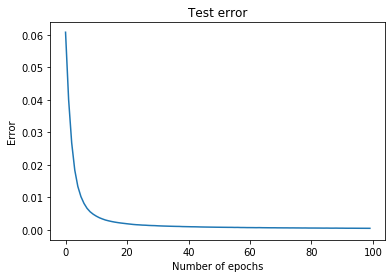

In [65]:
plt.title("Test error")
plt.xlabel("Number of epochs")
plt.ylabel("Error")
plt.plot(test_errs, 'r')
plt.plot(history.history['val_loss'])
plt.show()

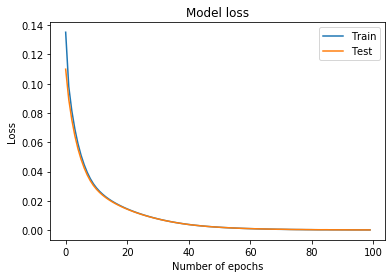

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

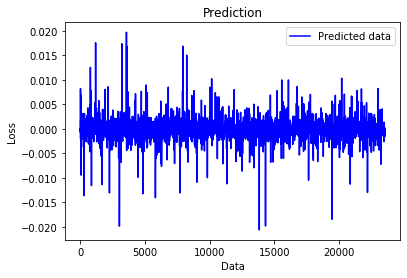

In [64]:
plt.plot(price_predictionFull, color = 'blue', label = 'Predicted data')
plt.ylabel('Loss')
plt.xlabel('Data')
plt.title('Prediction')
plt.legend()
plt.show()

In [27]:
# Reading and displaying data from file autotrader_encoded.csv
dataAuto = get_splits('../../data/encoded_data/autotrader_encoded.csv', 0.2)

X_trainAuto = dataAuto['X_train']
y_trainAuto = dataAuto['Y_train']
X_testAuto = dataAuto['X_test']
y_testAuto = dataAuto['Y_test']

display(X_trainAuto)
display(y_trainAuto)
display(X_testAuto)
display(y_testAuto)


starting to read csv...
finished reading csv.
splitting data into training and testing sets.


,year,condition,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,model_YARIS,model_Yukon,model_Yukon XL,model_Yukon XL Denali,model_Z3,model_Z4,model_ZDX,model_Zephyr,model_d'Elegance,model_del Sol
187851,0.041667,1.00,0.016300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71657,0.116667,0.50,0.024400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20191,0.041667,1.00,0.010800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72010,0.133333,0.50,0.000025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8698,0.083333,0.75,0.006560,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,0.075000,0.75,0.011200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107144,0.175000,0.50,0.026000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164469,0.058333,0.75,0.007829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172692,0.108333,0.50,0.011800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


187851    9.720755e-06
71657     4.861072e-06
20191     2.777755e-06
72010     1.055547e-06
8698      6.524392e-06
              ...     
1284      1.805263e-06
107144    6.388838e-07
164469    5.549122e-06
172692    2.222204e-06
31776     8.551320e-06
Name: price, Length: 157491, dtype: float64

,year,condition,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,model_YARIS,model_Yukon,model_Yukon XL,model_Yukon XL Denali,model_Z3,model_Z4,model_ZDX,model_Zephyr,model_d'Elegance,model_del Sol
150186,0.150000,0.50,0.012100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145522,0.050000,0.50,0.013700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73134,0.066667,0.75,0.014429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153604,0.050000,0.50,0.014415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112587,0.075000,0.50,0.010131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98348,0.125000,0.75,0.020362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149931,0.091667,0.75,0.009800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1226,0.075000,0.75,0.002548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33021,0.066667,0.75,0.009067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


150186    5.277735e-07
145522    1.527766e-06
73134     1.444433e-06
153604    2.486091e-07
112587    5.249958e-06
              ...     
98348     1.193046e-06
149931    1.249990e-06
1226      4.637463e-06
33021     4.133300e-07
191963    6.607725e-06
Name: price, Length: 39373, dtype: float64

In [28]:
X_trainAuto,X_valAuto,y_trainAuto,y_valAuto = train_test_split(X_trainAuto, y_trainAuto, test_size = 0.25, random_state = 0)

# Show the results of the split
print("The train set has an example of {}.".format(X_trainAuto.shape[0]))
print("Validation set has an example of {}.".format(X_valAuto.shape[0]))
print("The test set has an example of {}.".format(X_testAuto.shape[0]))

X_trainAuto=np.array(X_trainAuto) #lists are converted to numpy arrays
y_trainAuto=np.array(y_trainAuto)
X_valAuto=np.array(X_valAuto)
y_valAuto=np.array(y_valAuto)
X_testAuto=np.array(X_testAuto)
y_testAuto=np.array(y_testAuto)

The train set has an example of 118118.
Validation set has an example of 39373.
The test set has an example of 39373.


In [63]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import ModelCheckpoint, Callback
from keras import backend
from keras.optimizers import adam

# Lost function is selected as mean absolute error
loss_function='mean_absolute_error'

# The sequential model is created to use compile-fit-evaluate-predict methods
price_predictor = Sequential()

"""# Neural network layers are created with RELU activation
price_predictor.add(Dense(128,activation='relu', input_dim=755))  
price_predictor.add(Dense(64))
price_predictor.add(Dense(64))
price_predictor.add(Dense(64))
price_predictor.add(Dense(32,activation='relu'))
price_predictor.add(Dense(8))
price_predictor.add(Dense(1))
price_predictor.summary()"""
# Neural network layers are created with RELU activation
price_predictor.add(Dense(64,activation='relu', input_dim=755))  
price_predictor.add(Dense(32))
price_predictor.add(Dense(8))
price_predictor.add(Dense(1))
price_predictor.summary()


# Array used to store test errors
test_errs = []
opt = adam(lr=0.00001)

# Here the Adam optimizer (different type of stochastic gradient descent) is used.
price_predictor.compile(optimizer=opt, loss=loss_function, metrics=['accuracy'])

# It allows new callbacks by abstracting the base class.
checkpointer = ModelCheckpoint(filepath='price_prediction.hdf5', verbose=1, save_best_only=True)

# Trains the model according to the number of epoch given.
i=0;

history = price_predictor.fit(X_trainAuto, y_trainAuto, validation_data=(X_valAuto, y_valAuto), epochs=100, batch_size=500, callbacks=[checkpointer], verbose=0)
price_predictor.load_weights('price_prediction.hdf5')
TestscoreAuto=price_predictor.evaluate(X_testAuto,y_testAuto,verbose=0)
display("The final model scores {} for test data.".format(TestscoreAuto))
test_errs.append(TestscoreAuto)
    
price_predictionAuto=price_predictor.predict(X_testAuto)
display(price_predictionAuto)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 64)                48384     
_________________________________________________________________
dense_74 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_75 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_76 (Dense)             (None, 1)                 9         
Total params: 50,737
Trainable params: 50,737
Non-trainable params: 0
_________________________________________________________________

Epoch 00001: val_loss improved from inf to 0.06075, saving model to price_prediction.hdf5

Epoch 00002: val_loss improved from 0.06075 to 0.04006, saving model to price_prediction.hdf5

Epoch 00003: val_loss improved from 0.04006 to 0.02675, saving model to price_predi


Epoch 00082: val_loss improved from 0.00058 to 0.00058, saving model to price_prediction.hdf5

Epoch 00083: val_loss improved from 0.00058 to 0.00057, saving model to price_prediction.hdf5

Epoch 00084: val_loss improved from 0.00057 to 0.00056, saving model to price_prediction.hdf5

Epoch 00085: val_loss improved from 0.00056 to 0.00055, saving model to price_prediction.hdf5

Epoch 00086: val_loss did not improve

Epoch 00087: val_loss improved from 0.00055 to 0.00055, saving model to price_prediction.hdf5

Epoch 00088: val_loss improved from 0.00055 to 0.00054, saving model to price_prediction.hdf5

Epoch 00089: val_loss did not improve

Epoch 00090: val_loss improved from 0.00054 to 0.00053, saving model to price_prediction.hdf5

Epoch 00091: val_loss did not improve

Epoch 00092: val_loss improved from 0.00053 to 0.00052, saving model to price_prediction.hdf5

Epoch 00093: val_loss improved from 0.00052 to 0.00051, saving model to price_prediction.hdf5

Epoch 00094: val_loss did n

'The final model scores [0.0004836660399675854, 0.0] for test data.'

array([[-2.2734562e-04],
       [ 2.4621841e-05],
       [ 6.1695161e-04],
       ...,
       [-2.6602764e-05],
       [ 5.7260972e-05],
       [-1.0704296e-04]], dtype=float32)

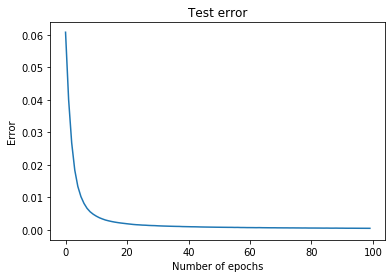

In [67]:
plt.title("Test error")
plt.xlabel("Number of epochs")
plt.ylabel("Error")
plt.plot(test_errs, 'r')
plt.plot(history.history['val_loss'])
plt.show()

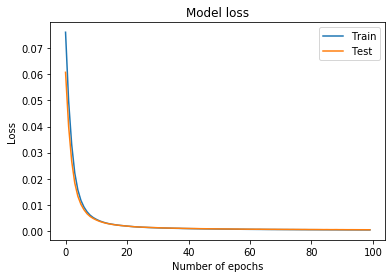

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

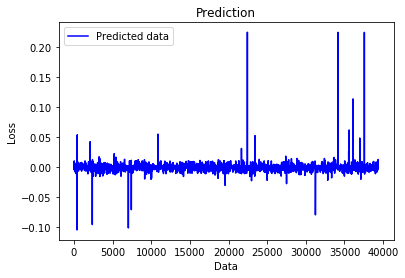

In [68]:
plt.plot(price_predictionAuto, color = 'blue', label = 'Predicted data')
plt.ylabel('Loss')
plt.xlabel('Data')
plt.title('Prediction')
plt.legend()
plt.show()

In [8]:
# Reading and displaying data from file mechanical_encoded.csv
dataMech = get_splits('../../data/encoded_data/mechanical_encoded.csv', 0.2)

X_trainMech = dataMech['X_train']
y_trainMech = dataMech['Y_train']
X_testMech = dataMech['X_test']
y_testMech = dataMech['Y_test']

display(X_trainMech)
display(y_trainMech)
display(X_testMech)
display(y_testMech)

starting to read csv...
finished reading csv.
splitting data into training and testing sets.


,year,cylinders,odometer,fuel_DIESEL,fuel_ELECTRIC,fuel_GAS,fuel_HYBRID,transmission_AUTOMATIC,transmission_MANUAL,drive_4WD,...,paint_color_BROWN,paint_color_CUSTOM,paint_color_GREEN,paint_color_GREY,paint_color_ORANGE,paint_color_PURPLE,paint_color_RED,paint_color_SILVER,paint_color_WHITE,paint_color_YELLOW
133149,0.114286,0.333333,0.011750,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64358,0.038095,0.333333,0.003077,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82396,0.133333,0.666667,0.016400,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
132504,0.095238,0.333333,0.016000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27514,0.085714,0.333333,0.010979,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31380,0.019048,0.333333,0.002032,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
139299,0.076190,0.500000,0.000015,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59215,0.095238,0.500000,0.014879,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76517,0.095238,0.500000,0.017785,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


133149    0.000001
64358     0.000004
82396     0.000002
132504    0.000002
27514     0.000002
            ...   
31380     0.000005
139299    0.000002
59215     0.000004
76517     0.000004
139697    0.000002
Name: price, Length: 120888, dtype: float64

,year,cylinders,odometer,fuel_DIESEL,fuel_ELECTRIC,fuel_GAS,fuel_HYBRID,transmission_AUTOMATIC,transmission_MANUAL,drive_4WD,...,paint_color_BROWN,paint_color_CUSTOM,paint_color_GREEN,paint_color_GREY,paint_color_ORANGE,paint_color_PURPLE,paint_color_RED,paint_color_SILVER,paint_color_WHITE,paint_color_YELLOW
93353,0.123810,0.500000,0.015887,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
42782,0.152381,0.333333,0.018701,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23256,0.038095,0.500000,0.005183,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
77589,0.076190,0.500000,0.006993,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
115307,0.114286,0.333333,0.013959,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114642,0.038095,0.500000,0.010600,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
89750,0.171429,0.333333,0.013000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
37482,0.076190,0.500000,0.002059,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
74871,0.114286,0.500000,0.018810,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


93353     1.387489e-06
42782     7.916603e-07
23256     7.871881e-06
77589     3.331918e-06
115307    4.166633e-07
              ...     
114642    5.083293e-06
89750     5.541622e-07
37482     3.609415e-06
74871     1.265268e-06
19538     7.159665e-06
Name: price, Length: 30222, dtype: float64

In [10]:
X_trainMech,X_valMech,y_trainMech,y_valMech = train_test_split(X_trainMech, y_trainMech, test_size = 0.25, random_state = 0)

# Show the results of the split
print("The train set has an example of {}.".format(X_trainMech.shape[0]))
print("Validation set has an example of {}.".format(X_valMech.shape[0]))
print("The test set has an example of {}.".format(X_testMech.shape[0]))

X_trainMech=np.array(X_trainMech) #lists are converted to numpy arrays
y_trainMech=np.array(y_trainMech)
X_valMech=np.array(X_valMech)
y_valMech=np.array(y_valMech)
X_testMech=np.array(X_testMech)
y_testMech=np.array(y_testMech)

The train set has an example of 67999.
Validation set has an example of 22667.
The test set has an example of 30222.


In [55]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import ModelCheckpoint, Callback
from keras import backend
from keras.optimizers import adam

# Lost function is selected as mean absolute error
loss_function='mean_absolute_error'

# The sequential model is created to use compile-fit-evaluate-predict methods
price_predictor = Sequential()

# Neural network layers are created with RELU activation
price_predictor.add(Dense(64,activation='relu', input_dim=35))  
price_predictor.add(Dense(32))
price_predictor.add(Dense(8))
price_predictor.add(Dense(1))
price_predictor.summary()


# Array used to store test errors
test_errs = []
opt = adam(lr=0.00001)

# Here the Adam optimizer (different type of stochastic gradient descent) is used.
price_predictor.compile(optimizer=opt, loss=loss_function, metrics=['accuracy'])

# It allows new callbacks by abstracting the base class.
checkpointer = ModelCheckpoint(filepath='price_prediction.hdf5', verbose=1, save_best_only=True)

# Trains the model according to the number of epoch given.
i=0;

history = price_predictor.fit(X_trainMech, y_trainMech, validation_data=(X_valMech, y_valMech), epochs=100, batch_size=500, callbacks=[checkpointer], verbose=0)
price_predictor.load_weights('price_prediction.hdf5')
TestscoreMech=price_predictor.evaluate(X_testMech,y_testMech,verbose=0)
display("The final model scores {} for test data.".format(TestscoreMech))
test_errs.append(TestscoreMech)
    
price_predictionMech=price_predictor.predict(X_testMech)
display(price_predictionMech)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 64)                2304      
_________________________________________________________________
dense_70 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_71 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 9         
Total params: 4,657
Trainable params: 4,657
Non-trainable params: 0
_________________________________________________________________

Epoch 00001: val_loss improved from inf to 0.23856, saving model to price_prediction.hdf5

Epoch 00002: val_loss improved from 0.23856 to 0.19129, saving model to price_prediction.hdf5

Epoch 00003: val_loss improved from 0.19129 to 0.15325, saving model to price_predict


Epoch 00079: val_loss improved from 0.00432 to 0.00426, saving model to price_prediction.hdf5

Epoch 00080: val_loss improved from 0.00426 to 0.00419, saving model to price_prediction.hdf5

Epoch 00081: val_loss improved from 0.00419 to 0.00414, saving model to price_prediction.hdf5

Epoch 00082: val_loss improved from 0.00414 to 0.00409, saving model to price_prediction.hdf5

Epoch 00083: val_loss improved from 0.00409 to 0.00407, saving model to price_prediction.hdf5

Epoch 00084: val_loss improved from 0.00407 to 0.00398, saving model to price_prediction.hdf5

Epoch 00085: val_loss improved from 0.00398 to 0.00393, saving model to price_prediction.hdf5

Epoch 00086: val_loss improved from 0.00393 to 0.00387, saving model to price_prediction.hdf5

Epoch 00087: val_loss improved from 0.00387 to 0.00383, saving model to price_prediction.hdf5

Epoch 00088: val_loss improved from 0.00383 to 0.00378, saving model to price_prediction.hdf5

Epoch 00089: val_loss improved from 0.00378 to 0.

'The final model scores [0.005434914853481275, 0.0] for test data.'

array([[ 8.9203129e-03],
       [-3.6767558e-03],
       [ 1.4848483e-05],
       ...,
       [ 6.4869819e-05],
       [-2.3332408e-02],
       [-2.3836509e-04]], dtype=float32)

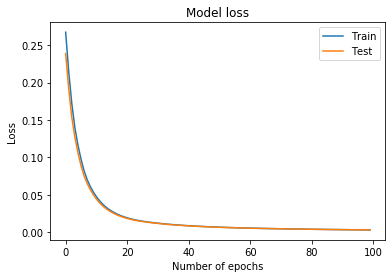

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

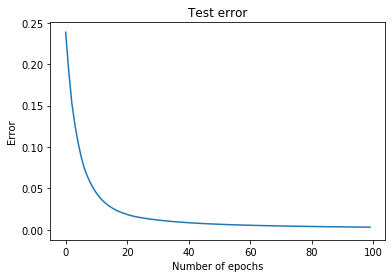

In [57]:
import matplotlib.pyplot as plt
plt.title("Test error")
plt.xlabel("Number of epochs")
plt.ylabel("Error")
plt.plot(test_errs, 'r')
plt.plot(history.history['val_loss'])
plt.show()

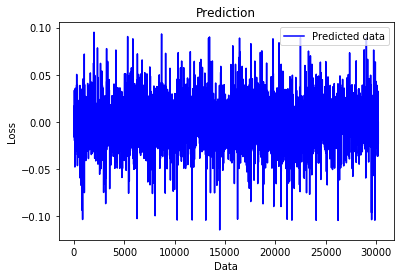

In [59]:
plt.plot(price_predictionMech, color = 'blue', label = 'Predicted data')
plt.ylabel('Loss')
plt.xlabel('Data')
plt.title('Prediction')
plt.legend()
plt.show()